#  Capstone 2 - State Police Traffic Stop Analysis

I was inspired by the data sets that can be found at these sites.

1. https://openpolicing.stanford.edu/data/

2. https://www.bea.gov/news/2021/personal-income-county-and-metropolitan-area-2020
  
I decided to pull state patrol data from 2 states that I've lived in. 
### Arizona and Connecticut.
Do reasons for traffic stops vary significantly based on affluency of the region where they occur? Do Arizona state
police stop motorists for more severe traffic violations than their Connecticut state counterparts?

As someone who has personally lived in both of these states, my personal interactions with the police officers varied substantially between these locations. It makes we wonder if police who interact with wealthier people are more likely to initiate a traffic stop for less severe reasons than their counterparts who work in lower income regions. I wonder if
the wealth of the surrounding region where the traffic stop occurs can be used to predict the outcome from the stop.

## =============================================================

# Data Import and Initial Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
az_data = pd.read_csv("az_statewide.csv", low_memory=False)
print("Original AZ data number of rows and columns. This data is from 01/2009 thru 12/2017") 
print(az_data.shape)

Original AZ data number of rows and columns. This data is from 01/2009 thru 12/2017
(3498159, 29)


In [3]:
display(az_data.head(5))
az_data.info(show_counts=True)

,raw_row_number,date,time,location,county_name,subject_race,subject_sex,officer_id_hash,type,violation,...,search_vehicle,search_basis,reason_for_stop,vehicle_type,vehicle_year,raw_Ethnicity,raw_OutcomeOfStop,raw_ReasonForStop,raw_TypeOfSearch,raw_ViolationsObserved
0,1,2009-01-06,01:00:00,I10 165,Maricopa County,hispanic,male,08a56c4f70,vehicular,other moving violation,...,False,NaN,Moving violation,12PU,2007.0,H,WA,H,NaN,OM
1,2,2009-01-18,01:58:00,US60 185,Maricopa County,white,male,08a56c4f70,vehicular,speed,...,False,NaN,Moving violation,4DSD,2004.0,W,WA,H,NaN,SP
2,3,2009-01-20,01:25:00,SR202 16,Maricopa County,hispanic,male,08a56c4f70,vehicular,NaN,...,False,NaN,Moving violation,4DSD,2001.0,H,WA,H,NaN,LU
3,4,2009-01-24,19:52:00,US60 172.4,Maricopa County,hispanic,female,08a56c4f70,vehicular,NaN,...,False,NaN,Moving violation,4DSD,2003.0,H,CI,H,NaN,LU
4,5,2009-01-25,02:25:00,US60 181,Maricopa County,white,female,08a56c4f70,vehicular,NaN,...,False,NaN,Moving violation,4DSD,2001.0,W,WA,H,NaN,LU


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498159 entries, 0 to 3498158
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   raw_row_number          3498159 non-null  int64  
 1   date                    3494153 non-null  object 
 2   time                    3494040 non-null  object 
 3   location                3494121 non-null  object 
 4   county_name             3124582 non-null  object 
 5   subject_race            3494091 non-null  object 
 6   subject_sex             3494122 non-null  object 
 7   officer_id_hash         3494153 non-null  object 
 8   type                    3498159 non-null  object 
 9   violation               1160415 non-null  object 
 10  arrest_made             3494126 non-null  object 
 11  citation_issued         3494126 non-null  object 
 12  warning_issued          3494126 non-null  object 
 13  outcome                 3125004 non-null  object 
 14  co

In [4]:
ct_data = pd.read_csv("ct_statewide.csv", low_memory = False)
print("Original CT data number of rows and columns. This data is from 09/2013 thru 09/2015")
print(ct_data.shape)

Original CT data number of rows and columns. This data is from 09/2013 thru 09/2015
(1175339, 26)


In [5]:
display(ct_data.head(5))
ct_data.info(show_counts=True)

,raw_row_number,date,time,location,lat,lng,county_name,subject_age,subject_race,subject_sex,...,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_SubjectRaceCode,raw_SubjectEthnicityCode,raw_SearchAuthorizationCode
0,1121,2013-10-01,00:13:00,"GREENWOOD AVE/DURANT AVE, BETHEL",NaN,NaN,Fairfield County,50.0,asian/pacific islander,male,...,False,citation,NaN,False,False,NaN,Registration,A,N,N
1,762,2013-10-01,00:00:00,"GREENWOOD AVENUE, BETHEL",NaN,NaN,Fairfield County,34.0,white,male,...,False,citation,NaN,False,False,NaN,Cell Phone,W,N,N
2,520,2013-10-01,10:06:00,"GREENWOOD AVE/RECTOR ST, BETHEL",NaN,NaN,Fairfield County,74.0,white,male,...,True,warning,NaN,False,False,NaN,Registration,W,N,N
3,820,2013-10-01,18:04:00,"STONY HILL ROAD, BETHEL",NaN,NaN,Fairfield County,55.0,white,female,...,False,citation,NaN,False,False,NaN,Registration,W,N,N
4,521,2013-10-01,17:45:00,"STONY HILL ROAD, BETHEL",NaN,NaN,Fairfield County,55.0,white,male,...,False,citation,NaN,False,False,NaN,Registration,W,N,N


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175339 entries, 0 to 1175338
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   raw_row_number               1175339 non-null  object 
 1   date                         1175339 non-null  object 
 2   time                         1175339 non-null  object 
 3   location                     1175339 non-null  object 
 4   lat                          252338 non-null   float64
 5   lng                          252338 non-null   float64
 6   county_name                  1174853 non-null  object 
 7   subject_age                  1171300 non-null  float64
 8   subject_race                 1175339 non-null  object 
 9   subject_sex                  1175339 non-null  object 
 10  officer_id_hash              1045976 non-null  object 
 11  department_name              1175339 non-null  object 
 12  type                         1153900 non-n

---------------------------------------------------------------------------------------------------------------
# Some initial exploration before any cleaning is done.

## Quick Look at Gender Proportions
Below are two graphs that quickly look at breakdown of gender in each state.
I just wanted to see if the groups seem comparable, meaning if the gender proportions are similar.
Based on my super quick calculations, it looks good. 

Quick estimating from these graphs:

AZ male:female 
[ $2.4e^6 : 1.1e^6$ ]  OR [ $2.2 : 1$ ]

and 

CT male:female 
[ $7.2e^5 : 4.1e^5$ ]  OR  [ $1.8 : 1$ ]
  
So in both cases these states are stopping roughly 2 males for every 1 female.

**Note: I'll want to run this again after I've filtered both state data sets to the same period of time, namely Jan.1, 2014 through Dec. 31,2014.**

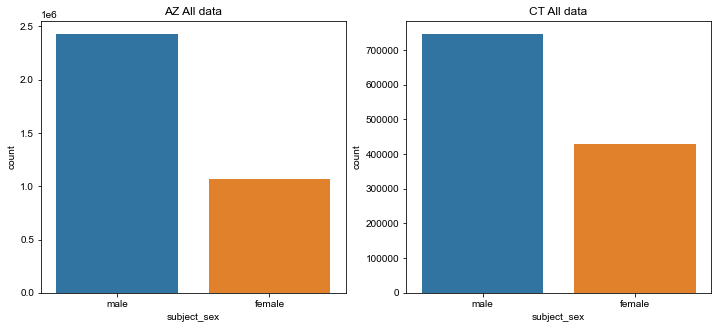

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x=az_data.subject_sex, ax=ax1)
sns.countplot(x=ct_data.subject_sex, ax=ax2)
ax1.set_title("AZ All data")
ax2.set_title("CT All data")
sns.set_style("whitegrid")
plt.show()

## Quick look at Reasons for the Traffic Stop

**Super interesting that the CT reason for traffic stops are so varied.**

I'm suspecting it is that they allowed multiple selections for the stop versus in AZ they only allowed 1 selection.  
I mean it is really cool that the Arizona data, which represents ~3.5million rows is fitting neatly into 9 stop categories.

Versus the CT data which is only ~1.2million rows, is a bajillion categories.

## I'll need to clean this up.

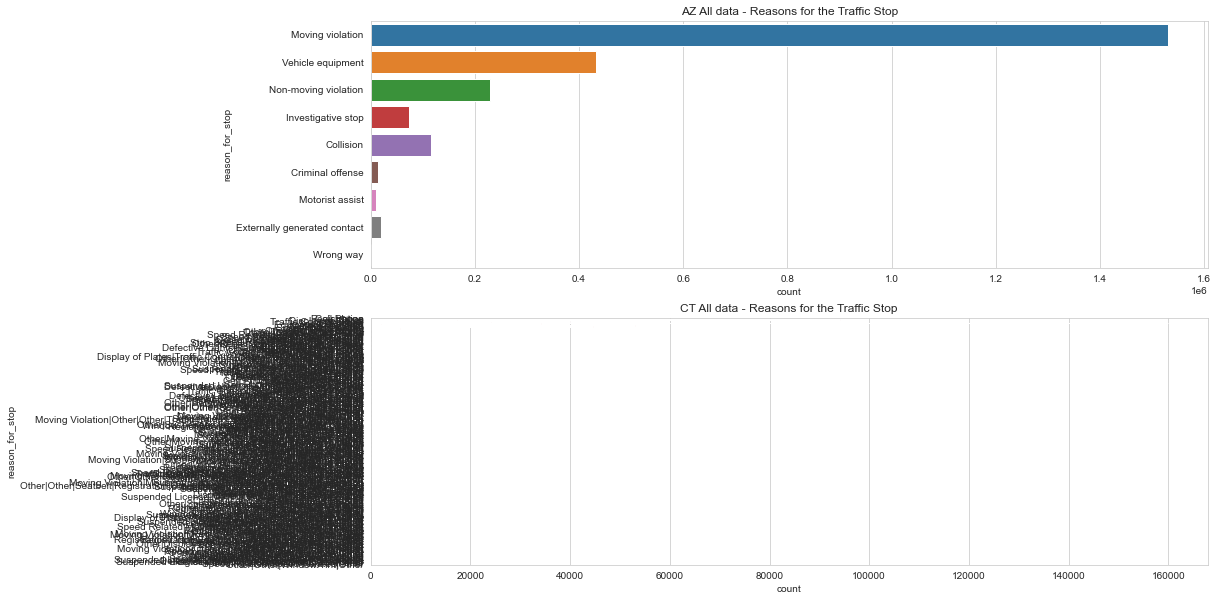

In [7]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10))

sns.countplot(y=az_data.reason_for_stop, ax = ax1)
sns.countplot(y=ct_data.reason_for_stop, ax = ax2)
ax1.set_title("AZ All data - Reasons for the Traffic Stop")
ax2.set_title("CT All data - Reasons for the Traffic Stop")
plt.show()

In [8]:
#This shows the reason for the above crazy looking y-axis on the CT graph.
ct_data.reason_for_stop.unique()

array(['Registration', 'Cell Phone', 'Other', 'Display of Plates',
       'Traffic Control Signal', 'Seatbelt', 'Speed Related', 'Stop Sign',
       'Equipment Violation', 'Defective Lights', 'Moving Violation',
       'Suspended License', 'Cell Phone|Other', 'Window Tint',
       'Other|Registration', 'Other|Defective Lights',
       'Other|Traffic Control Signal', 'Traffic Control Signal|Other',
       'Seatbelt|Cell Phone', 'Other|Cell Phone',
       'Speed Related|Suspended License', 'Moving Violation|Other',
       'Speed Related|Other', 'Speed Related|Moving Violation',
       'Stop Sign|Speed Related', 'Defective Lights|Stop Sign',
       'Defective Lights|Moving Violation', 'Other|Moving Violation',
       'Other|Speed Related', 'Speed Related|Other|Registration',
       'Stop Sign|Suspended License|Seatbelt',
       'Other|Registration|Suspended License', 'Registration|Other',
       'Other|Registration|Other', 'Speed Related|Seatbelt',
       'Cell Phone|Defective Lights',
  

# ========================================================
# Data Cleansing

I need to:
1. filter the time/date data for both data sets to be the same period of time
2. Fix the CT 'Reason for Stop' column.
3. pick columns I want to keep
4. make column names the same and concat the tables

In [9]:
# I want to use the delimiter and split up these values.
ct_data[['Primary_Stop'
         ,'reason_2','reason_3'
         ,'reason_4','reason_5'
         ,'reason_6','reason_7']] = ct_data['reason_for_stop'].str.split('|',n=-1,expand=True)

ct_data.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng',
       'county_name', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'department_name', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'search_conducted', 'search_vehicle',
       'search_basis', 'reason_for_stop', 'raw_SubjectRaceCode',
       'raw_SubjectEthnicityCode', 'raw_SearchAuthorizationCode',
       'Primary_Stop', 'reason_2', 'reason_3', 'reason_4', 'reason_5',
       'reason_6', 'reason_7'],
      dtype='object')

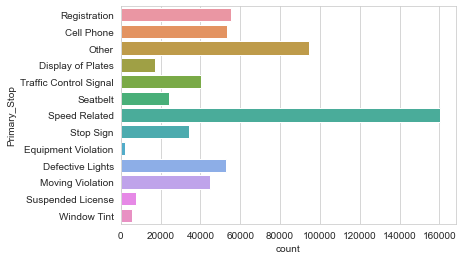

count            592975
unique               13
top       Speed Related
freq             160145
Name: Primary_Stop, dtype: object

In [10]:
sns.countplot(y=ct_data['Primary_Stop'])
plt.show()
ct_data.Primary_Stop.describe()

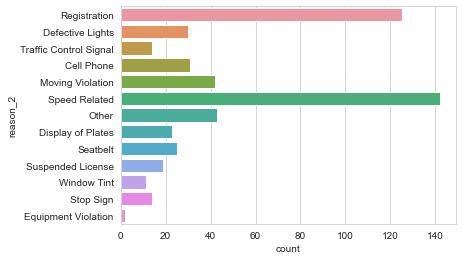

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94649 entries, 5 to 1175265
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   raw_row_number               94649 non-null  object 
 1   date                         94649 non-null  object 
 2   time                         94649 non-null  object 
 3   location                     94649 non-null  object 
 4   lat                          1110 non-null   float64
 5   lng                          1110 non-null   float64
 6   county_name                  94559 non-null  object 
 7   subject_age                  93890 non-null  float64
 8   subject_race                 94649 non-null  object 
 9   subject_sex                  94649 non-null  object 
 10  officer_id_hash              83895 non-null  object 
 11  department_name              94649 non-null  object 
 12  type                         87880 non-null  object 
 13  violation     

None

In [11]:
#Trying to figure out what are reasons listed if Primary stop was equal to 'other'

reasons_for_other = ct_data[ct_data['Primary_Stop']=='Other']
sns.countplot(y=reasons_for_other['reason_2'])
plt.show()
display(reasons_for_other.info())

# I was originally thinking about taking the secondary reason and recording it in the main column, but I'm not
# going to do that.  This is less than 700 pieces of data.  I'm okay with losing 700 pieces of data out of almost
# 600,000 total values.  Or if I do decide to keep some of these, I'll just harvest the speed related and the 
# registration reasons. Since these two reasons would account for about 300 of the 700 data points.

In [12]:
# Wanted to see what columns these have in common.  It is a bummer that the AZ data doesn't ahve the subject age.
# That would have been interesting to  analyze along with gender or nice to have kept as a controlled variable depending
# on the type of stats I run.

display(az_data.columns)
display(ct_data.columns)

Index(['raw_row_number', 'date', 'time', 'location', 'county_name',
       'subject_race', 'subject_sex', 'officer_id_hash', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'contraband_drugs', 'contraband_other',
       'search_conducted', 'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_type', 'vehicle_year', 'raw_Ethnicity',
       'raw_OutcomeOfStop', 'raw_ReasonForStop', 'raw_TypeOfSearch',
       'raw_ViolationsObserved'],
      dtype='object')

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng',
       'county_name', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'department_name', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'search_conducted', 'search_vehicle',
       'search_basis', 'reason_for_stop', 'raw_SubjectRaceCode',
       'raw_SubjectEthnicityCode', 'raw_SearchAuthorizationCode',
       'Primary_Stop', 'reason_2', 'reason_3', 'reason_4', 'reason_5',
       'reason_6', 'reason_7'],
      dtype='object')

## Creating the data tables I need.

Both datasets need to be over the same period of time.
And I want to limit the size of my final data set to under 1 million rows, if possible.
Therefore, I'm selecting **1/1/2014 thru 12/31/2014** for both state data sets.
*I'm attempting to control for the variable of time in my final datatable.*

I'm picking a subset of columns from the original data sets that I think will be most helpful.

I may narrow down this list further after I do some analysis and exploration.

In [14]:
# Creating my subset of AZ data columns and setting the date column to be datatime type.

az_data_columns_subset = az_data[['date','time','location','county_name','subject_sex','violation'
                                  ,'arrest_made', 'citation_issued', 'warning_issued', 'outcome'
                                  ,'contraband_found', 'search_conducted', 'search_vehicle'
                                  , 'search_basis','reason_for_stop']]

az_data_columns_subset.loc[:,('date')] = pd.to_datetime(az_data_columns_subset.date)

In [15]:
#I couldn't figure out an elegant and easy way to do this in one statement, so I used two.
sub_az_data = az_data_columns_subset[az_data_columns_subset['date']>='2014-01-01']
subset_az_data = sub_az_data[sub_az_data['date']<='2014-12-31']

# I want to add a column with the state name so that when I concat these 2 tables, it is easy to distinguish the states.
subset_az_data.insert(loc = 4, column ='state',value = "AZ")

subset_az_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491786 entries, 50479 to 2194479
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              491786 non-null  datetime64[ns]
 1   time              491786 non-null  object        
 2   location          491784 non-null  object        
 3   county_name       432806 non-null  object        
 4   state             491786 non-null  object        
 5   subject_sex       491786 non-null  object        
 6   violation         281478 non-null  object        
 7   arrest_made       491786 non-null  object        
 8   citation_issued   491786 non-null  object        
 9   warning_issued    491786 non-null  object        
 10  outcome           436143 non-null  object        
 11  contraband_found  23000 non-null   object        
 12  search_conducted  491786 non-null  bool          
 13  search_vehicle    491786 non-null  object        
 14 

In [16]:
# Creating my subset of CT data columns and setting the date column to be datatime type.

ct_data_columns_subset = ct_data[['date', 'time', 'location','county_name', 'subject_sex','violation'
                                  ,'arrest_made', 'citation_issued', 'warning_issued', 'outcome','contraband_found'
                                  , 'search_conducted', 'search_vehicle','search_basis', 'Primary_Stop']]

ct_data_columns_subset.loc[:,('date')] = pd.to_datetime(ct_data_columns_subset.date)

In [17]:
# Pull data from the same time range as above.  

sub_ct_data = ct_data_columns_subset[ct_data_columns_subset['date']>='2014-01-01']
subset_ct_data = sub_ct_data[sub_ct_data['date']<='2014-12-31']

# I want to add a column with the state name so that when I concat these 2 tables, it is easy to distinguish the states.
subset_ct_data.insert(loc = 4, column ='state',value = "CT")

# I want to rename the Primary Stop column in the CT data to be the same column name as the AZ data so that when
# I concat the 2 tables, this data is all collected in the same column.

clean_ct_data = subset_ct_data.rename(columns ={'Primary_Stop':'reason_for_stop'})
clean_ct_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603537 entries, 27637 to 1175338
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              603537 non-null  datetime64[ns]
 1   time              603537 non-null  object        
 2   location          603537 non-null  object        
 3   county_name       603385 non-null  object        
 4   state             603537 non-null  object        
 5   subject_sex       603537 non-null  object        
 6   violation         603125 non-null  object        
 7   arrest_made       603533 non-null  object        
 8   citation_issued   603535 non-null  object        
 9   warning_issued    603535 non-null  object        
 10  outcome           594158 non-null  object        
 11  contraband_found  24401 non-null   object        
 12  search_conducted  603537 non-null  bool          
 13  search_vehicle    603537 non-null  bool          
 14 

------------------------------------
## Now that I subsetted the data based on time, I wanted to look at the above graphs again.

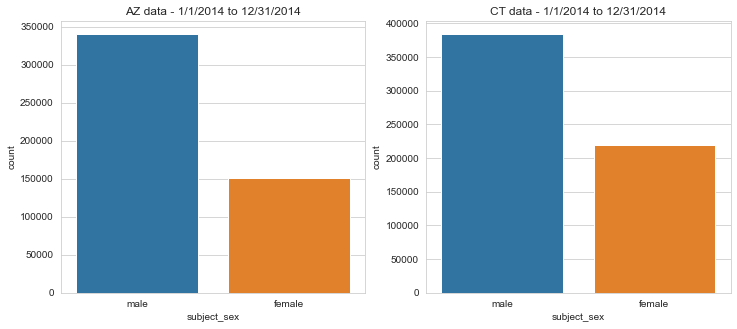

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x=subset_az_data.subject_sex, ax=ax1)
sns.countplot(x=clean_ct_data.subject_sex, ax=ax2)
ax1.set_title("AZ data - 1/1/2014 to 12/31/2014")
ax2.set_title("CT data - 1/1/2014 to 12/31/2014")
sns.set_style("whitegrid")
plt.show()

# This is good, the proportions of this subset of data appear to be roughly equivalent to the larger data sets.
# Additionally, the two data sets are roughly the same size for the calendar year of 2014.

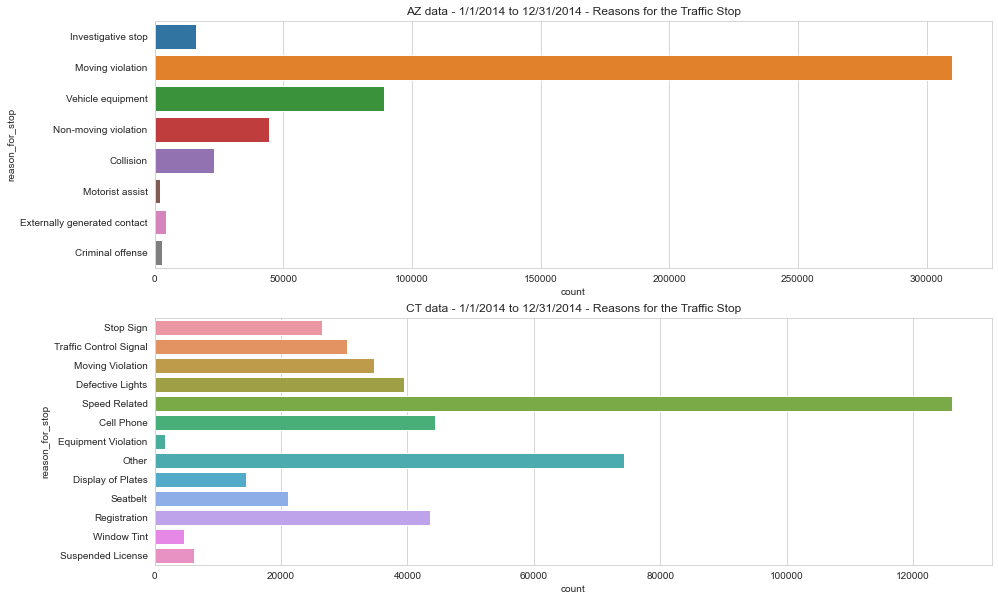

In [19]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10))

sns.countplot(y=subset_az_data.reason_for_stop, ax = ax1)
sns.countplot(y=clean_ct_data.reason_for_stop, ax = ax2)
ax1.set_title("AZ data - 1/1/2014 to 12/31/2014 - Reasons for the Traffic Stop")
ax2.set_title("CT data - 1/1/2014 to 12/31/2014 - Reasons for the Traffic Stop")
plt.show()

# I'm interested in the disparity between magnitude of the moving violation category between these two states.
# I wonder if the AZ data has speed related contained within the moving violation category.
# I wonder what is contained in the "other" category for the CT data. Are these stops also moving violations?

---------------------------------------------------------------------------------------------------
# Concat both states' data, join with income data, and save as a csv file.

In [20]:
all_states_data = pd.concat([subset_az_data,clean_ct_data], ignore_index=True) 

all_states_data.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095323 entries, 0 to 1095322
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   date              1095323 non-null  datetime64[ns]
 1   time              1095323 non-null  object        
 2   location          1095321 non-null  object        
 3   county_name       1036191 non-null  object        
 4   state             1095323 non-null  object        
 5   subject_sex       1095323 non-null  object        
 6   violation         884603 non-null   object        
 7   arrest_made       1095319 non-null  object        
 8   citation_issued   1095321 non-null  object        
 9   warning_issued    1095321 non-null  object        
 10  outcome           1030301 non-null  object        
 11  contraband_found  47401 non-null    object        
 12  search_conducted  1095323 non-null  bool          
 13  search_vehicle    1095323 non-null  object

In [21]:
# I need to see how all of the counties are written in this traffic data table so that I can 
# be sure to set up my per capita income table accordingly.

all_states_data.county_name.unique()

array(['Mohave County', 'Yavapai County', nan, 'Yuma County',
       'Pinal County', 'Gila County', 'Santa Cruz County',
       'Maricopa County', 'Cochise County', 'Pima County',
       'Navajo County', 'Coconino County', 'Graham County',
       'Apache County', 'La Paz County', 'Greenlee County',
       'Fairfield County', 'Hartford County', 'Litchfield County',
       'Middlesex County', 'New Haven County', 'New London County',
       'Tolland County', 'Windham County'], dtype=object)

### The state per capita personal income data I found was from the **Bureau of Economic Analysis** website.

I used the CAINC1 report which was on "Personal Income, Population, Per Capita Personal Income"
And I pulled it by county for all counties in AZ and CT over the years 2013 through 2015.
https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&isuri=1&acrdn=6#reqid=70&step=1&isuri=1&acrdn=6

if that above link didn't work, try this one. https://apps.bea.gov/iTable/index_regional.cfm



In [22]:
# I tidied up the csv I downloaded from bea.gov and made sure my counties were properly formatted, etc.
# I also created the average income column while in Excel.
# This table has 3 years worth of income data because I was originally going to analyze a different period of time.
# But now I will only use the percaptia data from 2014.

income_data = pd.read_csv("income data.csv", low_memory=False)
display(income_data)

,state,county_name,percapita_income_2013,percapita_income_2014,percapita_income_2015,Avg_income_2013_to_2015
0,AZ,Apache County,27385,28579,29769,28578
1,AZ,Cochise County,34390,35429,36583,35467
2,AZ,Coconino County,38836,40736,43063,40878
3,AZ,Gila County,32394,33875,35408,33892
4,AZ,Graham County,27045,28593,28754,28131
5,AZ,Greenlee County,34881,36050,34176,35036
6,AZ,La Paz County,28324,27963,30220,28836
7,AZ,Maricopa County,39480,41164,42761,41135
8,AZ,Mohave County,27214,28718,29397,28443
9,AZ,Navajo County,26286,26873,27692,26950


In [23]:
# I'll only join the 2014 per capita personal income data over this 2 year period.
# I'm most interested in looking at traffic data on a county level.
# Also, as I do this merge, it will automatically drop all of the rows with missing county name.
# This is good! It saves me a step, later. It is ~59K rows of data. However, since this table has ~1.1M rows
# this only represents ~5.4% of the raw data that I'm discarding in this step.  I can live with that!

subset_income_data = income_data[['county_name', 'percapita_income_2014']]
all_data = all_states_data.merge(subset_income_data, on ='county_name')
display(all_data.head())
print("Number of rows and columns in this table", all_data.shape)

,date,time,location,county_name,state,subject_sex,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,percapita_income_2014
0,2014-04-01,10:58:00,US93 67,Mohave County,AZ,male,NaN,False,True,False,citation,NaN,False,False,NaN,Investigative stop,28718
1,2014-04-01,12:35:00,US93 67,Mohave County,AZ,male,NaN,False,True,False,citation,NaN,False,False,NaN,Investigative stop,28718
2,2014-04-01,16:41:00,SR95 231,Mohave County,AZ,female,speed,False,False,True,warning,NaN,False,False,NaN,Moving violation,28718
3,2014-04-01,16:59:00,SR95 231,Mohave County,AZ,male,speed,False,True,False,citation,NaN,False,False,NaN,Moving violation,28718
4,2014-04-01,18:11:00,SR95 239,Mohave County,AZ,female,speed,False,False,True,warning,NaN,False,False,NaN,Moving violation,28718


Number of rows and columns in this table (1036191, 17)


In [24]:
# Create a new csv file with my cleaned state data that I just joined with the income data.

all_data.to_csv('CT_and_AZ_Traffic_and_Income.csv')

## Note, I did a little bit of cleaning up in Excel, now that this csv is only ~1million rows.
Things like:
1. rename AZ "Moving violation" to be the same as CT "Moving Violation" in the reason for stop column. 
 - This renamed 347,243 data values in this column.
2. removed 136,173 rows of data that had NO "reason for stop" listed.  
 - Since this is the main focal point of my analyses, and since I have plenty of rows of data, I feel good about removing these data points for the purposes of this anaysis.  Interesting to note that this data is ALL from CT. By removing these rows, I get the data set more evenly split between the 2 states. Now I have 432,806 data points for AZ and 467,212 data points for CT. (cool!)

# ======================================================

# Analyses - Initial Exploration with full data set.

In [7]:
sns.set_theme(style="darkgrid")
all_data = pd.read_csv("CT_and_AZ_Traffic_and_Income.csv", low_memory=False)
display(all_data.head())
print("Number of rows and columns in this table", all_data.shape)

,date,time,location,county_name,state,subject_sex,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,percapita_income_2014
0,4/1/2014,10:58:00,US93 67,Mohave County,AZ,male,NaN,False,True,False,citation,NaN,False,False,NaN,Investigative stop,28718
1,4/1/2014,12:35:00,US93 67,Mohave County,AZ,male,NaN,False,True,False,citation,NaN,False,False,NaN,Investigative stop,28718
2,4/1/2014,16:41:00,SR95 231,Mohave County,AZ,female,speed,False,False,True,warning,NaN,False,False,NaN,Moving Violation,28718
3,4/1/2014,16:59:00,SR95 231,Mohave County,AZ,male,speed,False,True,False,citation,NaN,False,False,NaN,Moving Violation,28718
4,4/1/2014,18:11:00,SR95 239,Mohave County,AZ,female,speed,False,False,True,warning,NaN,False,False,NaN,Moving Violation,28718


Number of rows and columns in this table (900018, 17)


In [8]:
# Need to fix the data types before I start making graphs.

all_data = all_data.convert_dtypes()
all_data['date'] = pd.to_datetime(all_data['date'])
all_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900018 entries, 0 to 900017
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   900018 non-null  datetime64[ns]
 1   time                   900018 non-null  string        
 2   location               900018 non-null  string        
 3   county_name            900018 non-null  string        
 4   state                  900018 non-null  string        
 5   subject_sex            900018 non-null  string        
 6   violation              718200 non-null  string        
 7   arrest_made            900014 non-null  boolean       
 8   citation_issued        900016 non-null  boolean       
 9   warning_issued         900016 non-null  boolean       
 10  outcome                845701 non-null  string        
 11  contraband_found       37881 non-null   boolean       
 12  search_conducted       900018 non-null  bool

In [28]:
# May want to use this at some point to clean up my violation codes for CT.
# https://github.com/trendct/ct-tickets/blob/master/data/infractions.csv

# This column of data is odd.  Looks like the state of CT uses violation codes.
# But the state of AZ uses descriptors.
# And BOTH states allow for multiple reasons to be selected and recorded for this field.

display(all_data.violation.describe())
display(all_data.violation.unique())

count     718200
unique      5138
top        speed
freq      202450
Name: violation, dtype: object

<StringArray>
[                                  <NA>,
                                'speed',
                    'failure to signal',
               'other moving violation',
                             'speed|NA',
                                'NA|NA',
            'other moving violation|NA',
                          'speed|NA|NA',
   'NA|NA|other moving violation|speed',
              'failure to signal|speed',
 ...
 '14-215|14-213B|NA|14-18(d)|14-147(c)',
                             '53a-181k',
                  '21A-267|21a-279(a)*',
              '14-219(b)|21a-267(d)(1)',
              '14-99g(g)|21a-267(d)(1)',
                              '14-80 h',
                        '14-227a(a)2nZ',
                            '14-96 21A',
                     '14-222|14-223(a)',
                  '14-18(a)|21a-279(a)']
Length: 5139, dtype: string

In [9]:
# Need to think about how I want to classify reason for stop data as either More Severe or Less Severe.

display(all_data.reason_for_stop.unique())

<StringArray>
[          'Investigative stop',             'Moving Violation',
            'Vehicle equipment',         'Non-Moving Violation',
 'Externally generated contact',                    'Collision',
             'Criminal offense',              'Motorist assist',
                    'Stop Sign',       'Traffic Control Signal',
             'Defective Lights',                'Speed Related',
                   'Cell Phone',          'Equipment Violation',
                        'Other',            'Display of Plates',
                     'Seatbelt',                 'Registration',
                  'Window Tint',            'Suspended License']
Length: 20, dtype: string

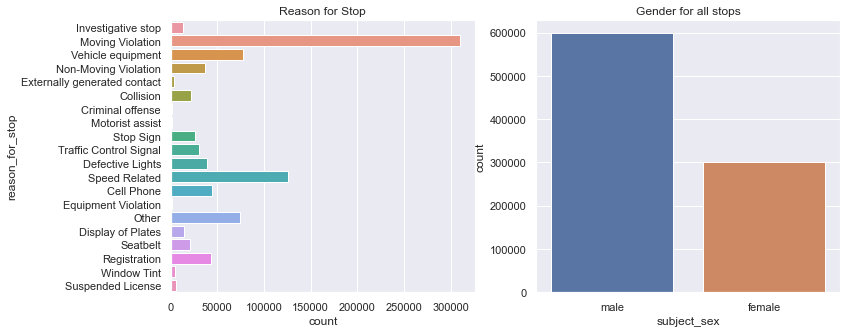

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x=all_data.subject_sex, ax=ax2)
sns.countplot(y=all_data.reason_for_stop, ax=ax1)
ax1.set_title("Reason for Stop")
ax2.set_title("Gender for all stops")
plt.show()

# Cleaning Up The "Reasons for Traffic Stops" column.

### Moving Violations vs Non-Moving Violations in Arizona - I used these sites to make this determination.
1.https://www.hamplaw.com/civil-vs-criminal-tickets-

2.https://www.azcriminaltraffic.com/arizona-driver-s-license-points-and-consequences

3.https://www.crimeandinjurylaw.com/blog/2020/02/moving-violations-in-arizona/

4.https://www.ncourt.com/ncourtuniversal/Juris/AZ/AZMayerCi/CITATION/fees.pdf

Moving Violations are things like: 
- Speeding
- DUI
- Failing to stop at a light
- Failing to stop at a stop sign
- Reckless or Agressive Driving.

Non-Moving Violations are things like:
- Seat Belt violation
- Registration - no proof or not current
- Suspended Plates
- Vehicle lights or window tint infractions
- No valid license

In [44]:
## Create subsets of more severe and less severe reasons for the traffic stop.
# Note that my determination of less severe reasons to be stopped were picked based on the above research.
# I am going to exclude the categories of "other", "Vehicle equipment", "Externally generaged contact",
# "Motorist assist", "Criminal offense", "Suspended License" and "Equipment Violation" from either category.
# I'm excluding these for a variety of reasons. Perhaps they had relative few data points in them.
# Or perhaps they are too ambigous to me and I'm not sure where best to place them.

less_severe_list = ['Defective Lights'
                    ,'Cell Phone'
                    ,'Seatbelt'
                    ,'Window Tint'
                    ,'Non-Moving Violation'
                    ,'Display of Plates'
                   ]

more_severe_list = ['Investigative stop'
                    ,'Moving Violation'
                    ,'Collision'
                    ,'Speed Related'
                    ,'Stop Sign'
                    ,'Traffic Control Signal'
                   ]


less_severe = all_data.loc[all_data['reason_for_stop'].isin(less_severe_list)]

more_severe = all_data.loc[all_data['reason_for_stop'].isin(more_severe_list)]

print('Rows and Columns for subset of LESS severe reasons for a traffic stop', less_severe.shape)
print('Rows and Columns for subset of MORE severe reasons for a traffic stop', more_severe.shape)
print('My current selection results in a ~3:1 ratio of (count of more severe) to (count of less severe)')

Rows and Columns for subset of LESS severe reasons for a traffic stop (160460, 17)
Rows and Columns for subset of MORE severe reasons for a traffic stop (529532, 17)
My current selection results in a ~3:1 ratio of (count of more severe) to (count of less severe)


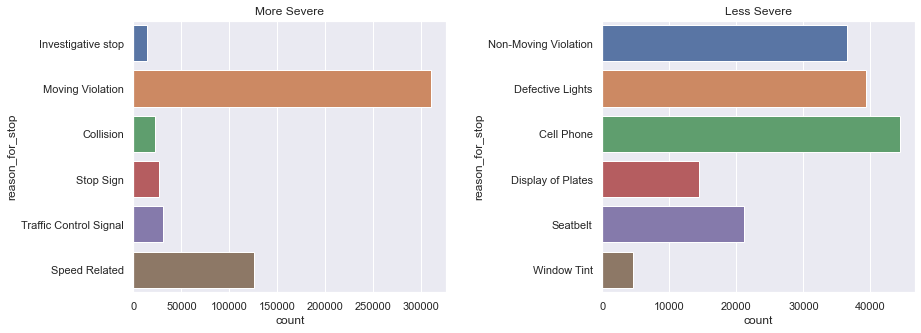

In [13]:
# Quick visualization of these 2 new overarching categories.

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

fig.subplots_adjust(wspace=0.5)

sns.countplot(y=more_severe.reason_for_stop, ax=ax1)
sns.countplot(y=less_severe.reason_for_stop, ax=ax2)
ax1.set_title("More Severe")
ax2.set_title("Less Severe")
plt.show()

In [45]:
# Assigning a numeric value of 1 for more severe stops and 0 for less severe stops.

less_severe.insert(loc = 15, column ='severity_value',value = 0)
more_severe.insert(loc = 15, column ='severity_value',value = 1)

all_data_2 = pd.concat([less_severe,more_severe], ignore_index=True) 

all_data_2.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689992 entries, 0 to 689991
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   689992 non-null  datetime64[ns]
 1   time                   689992 non-null  string        
 2   location               689992 non-null  string        
 3   county_name            689992 non-null  string        
 4   state                  689992 non-null  string        
 5   subject_sex            689992 non-null  string        
 6   violation              589209 non-null  string        
 7   arrest_made            689988 non-null  boolean       
 8   citation_issued        689990 non-null  boolean       
 9   warning_issued         689990 non-null  boolean       
 10  outcome                678237 non-null  string        
 11  contraband_found       27381 non-null   boolean       
 12  search_conducted       689992 non-null  bool

In [46]:
# Create a new csv file with this sorted and cleaned severity of stop data.

all_data_2.to_csv('All_Data_with_Severity.csv', index=False)

## More Initial Analyses

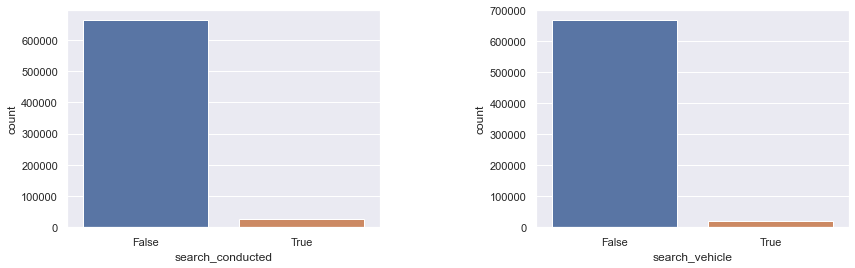

In [49]:
# I wanted to explore the search conducted vs search vehicle columns a bit better.

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x=all_data_2.search_conducted, ax=ax1)
sns.countplot(x=all_data_2.search_vehicle, ax=ax2)
plt.show()

 ## I'm wondering under what circumstances is a "search conducted = True" but the "vehicle searched = False"? 
 
 ### For example, is this when the driver is phyically searched but their car is not?

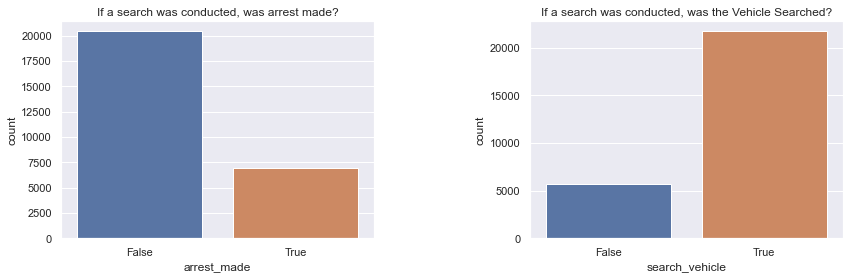

In [50]:
#subset of search conducted
sub_search = all_data_2[all_data_2['search_conducted'] == True]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x=sub_search.arrest_made, ax=ax1)
ax1.set_title("If a search was conducted, was arrest made?")

sns.countplot(x=sub_search.search_vehicle, ax=ax2)
ax2.set_title("If a search was conducted, was the Vehicle Searched?")
plt.show()

# =========================================================
# Traffic Stop Severity
## Analysis of income variations and gender variations

In [2]:
# Import most recent csv again.

sns.set_theme(style="darkgrid")
all_data_2 = pd.read_csv("All_Data_with_Severity.csv", low_memory=False)
display(all_data_2.head())
print("Number of rows and columns in this table", all_data_2.shape)

,date,time,location,county_name,state,subject_sex,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,severity_value,reason_for_stop,percapita_income_2014
0,4/1/2014,4:36:00,I40 52,Mohave County,AZ,male,NaN,False,True,False,citation,False,True,True,probable cause,0,Non-Moving Violation,28718
1,4/1/2014,10:30:00,I40 54,Mohave County,AZ,male,NaN,False,False,True,warning,NaN,False,False,NaN,0,Non-Moving Violation,28718
2,4/2/2014,10:10:00,I40 48,Mohave County,AZ,male,NaN,False,True,False,citation,NaN,False,False,NaN,0,Non-Moving Violation,28718
3,4/2/2014,8:30:00,SR95 233,Mohave County,AZ,female,NaN,False,True,False,citation,NaN,False,False,NaN,0,Non-Moving Violation,28718
4,4/2/2014,13:46:00,SR95 233,Mohave County,AZ,male,NaN,True,True,False,arrest,True,True,True,probable cause,0,Non-Moving Violation,28718


Number of rows and columns in this table (689992, 18)


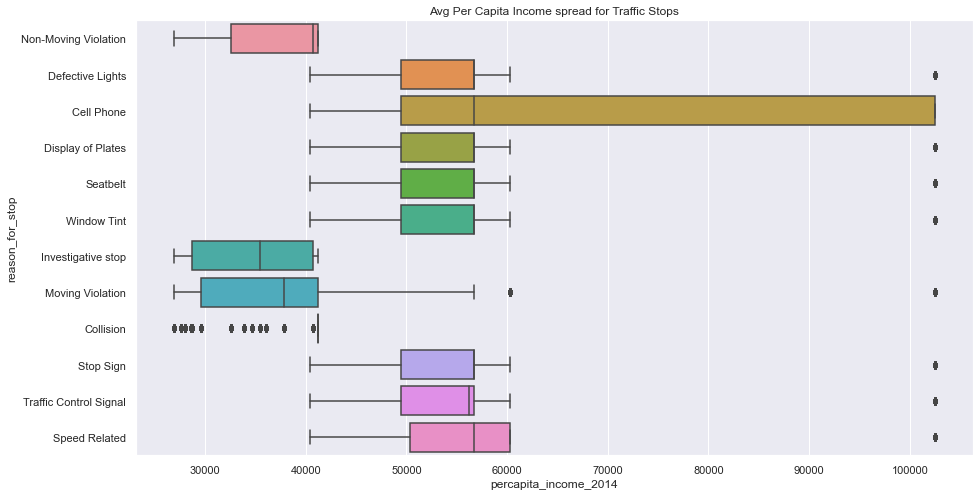

In [3]:
plt.figure(figsize = (15,8))
sns.boxplot(y="reason_for_stop", x="percapita_income_2014", data=all_data_2)
plt.title("Avg Per Capita Income spread for Traffic Stops")
plt.show()

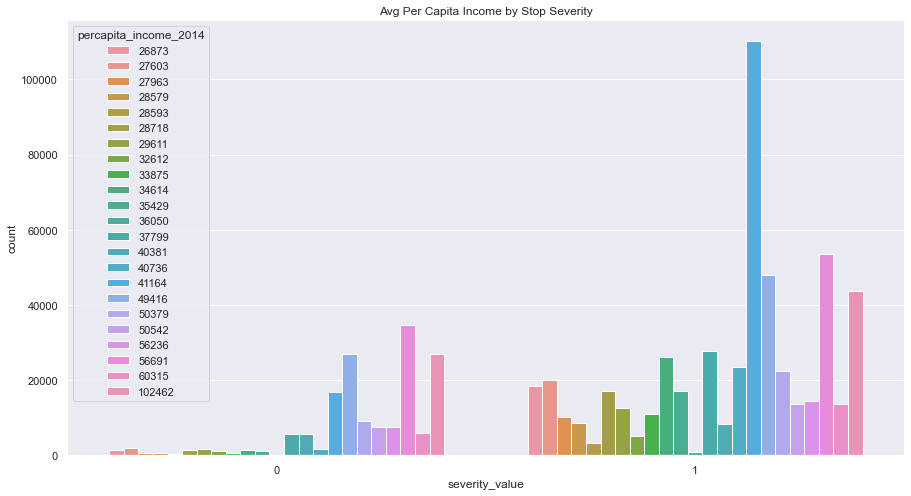

In [4]:
plt.figure(figsize = (15,8))
sns.countplot(x="severity_value", hue="percapita_income_2014", data=all_data_2)
plt.title("Avg Per Capita Income by Stop Severity")
plt.show()

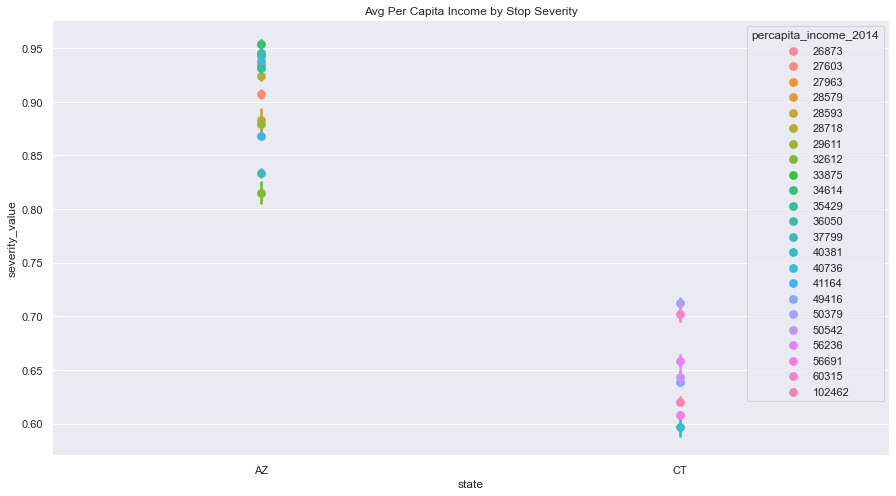

In [5]:
plt.figure(figsize = (15,8))
sns.pointplot(y="severity_value", x="state", data=all_data_2, hue="percapita_income_2014")
plt.title("Avg Per Capita Income by Stop Severity")
plt.show()

## -----------------------------------------------------------------------------------------------------

### Looking more closely at Less Severe stops

In [3]:
less_severe_reasons = all_data_2[all_data_2['severity_value']==0]
print(less_severe_reasons['reason_for_stop'].value_counts(normalize=True))

Cell Phone              0.276592
Defective Lights        0.245588
Non-Moving Violation    0.227770
Seatbelt                0.131833
Display of Plates       0.089673
Window Tint             0.028543
Name: reason_for_stop, dtype: float64


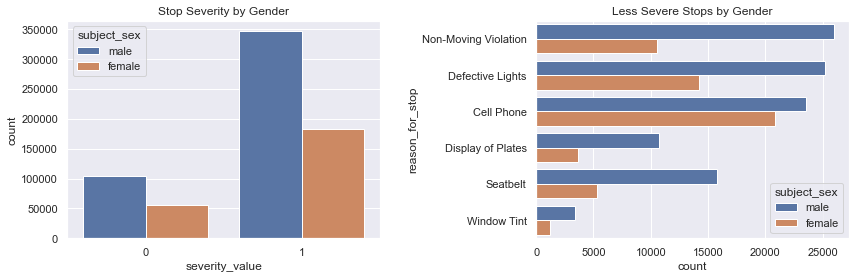

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x="severity_value", hue="subject_sex", data=all_data_2, ax=ax1)
ax1.set_title("Stop Severity by Gender")

sns.countplot(y="reason_for_stop", hue="subject_sex", data=less_severe_reasons, ax=ax2)
ax2.set_title("Less Severe Stops by Gender")


plt.show()

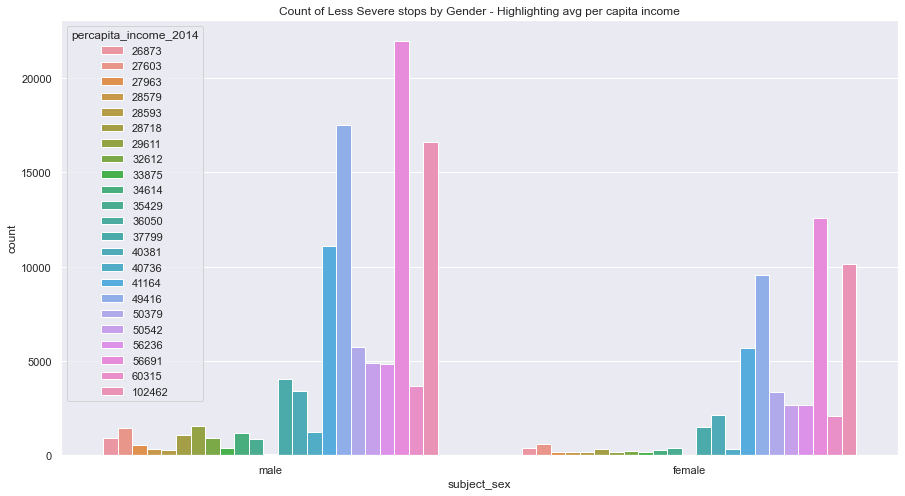

In [5]:
plt.figure(figsize = (15,8))
sns.countplot(x="subject_sex", hue="percapita_income_2014", data=less_severe_reasons)
plt.title("Count of Less Severe stops by Gender - Highlighting avg per capita income")
plt.show()

## -----------------------------------------------------------------------------------------------------

### Looking more closely at More Severe stops

In [6]:
more_severe_reasons = all_data_2[all_data_2['severity_value']==1]
print(more_severe_reasons['reason_for_stop'].value_counts(normalize=True))

Moving Violation          0.586735
Speed Related             0.238178
Traffic Control Signal    0.057337
Stop Sign                 0.050059
Collision                 0.041826
Investigative stop        0.025864
Name: reason_for_stop, dtype: float64


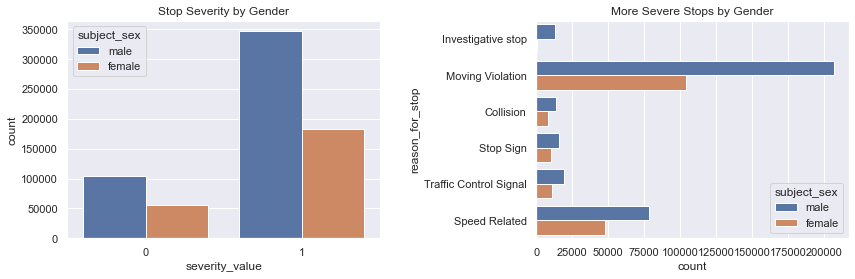

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x="severity_value", hue="subject_sex", data=all_data_2, ax=ax1)
ax1.set_title("Stop Severity by Gender")

sns.countplot(y="reason_for_stop", hue="subject_sex", data=more_severe_reasons, ax=ax2)
ax2.set_title("More Severe Stops by Gender")

plt.show()

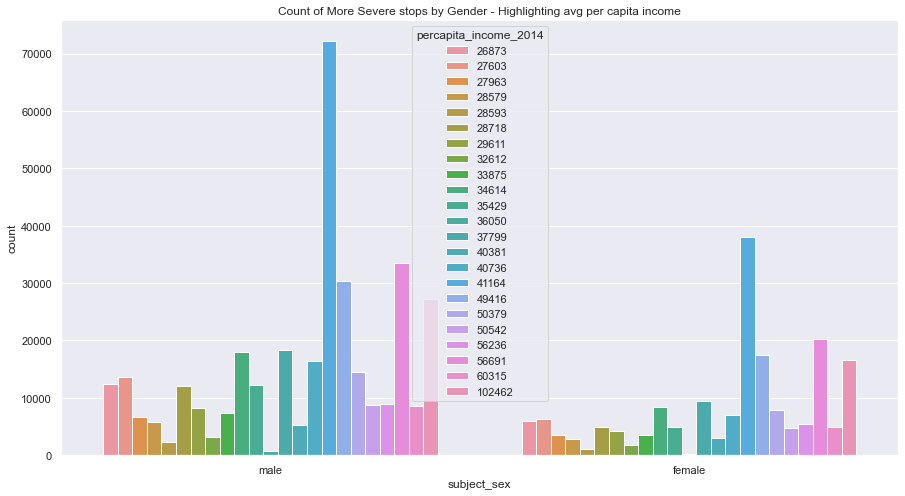

In [8]:
plt.figure(figsize = (15,8))
sns.countplot(x="subject_sex", hue="percapita_income_2014", data=more_severe_reasons)
plt.title("Count of More Severe stops by Gender - Highlighting avg per capita income")
plt.show()

In [9]:
display(all_data_2.groupby('reason_for_stop').mean())

,search_conducted,search_vehicle,severity_value,percapita_income_2014
reason_for_stop,,,,
Cell Phone,0.030891,0.006917,0.0,67482.975914
Collision,0.134595,0.126738,1.0,39555.395566
Defective Lights,0.042505,0.038826,0.0,60946.600096
Display of Plates,0.087914,0.074223,0.0,61514.813052
Investigative stop,0.051621,0.030155,1.0,34762.554103
Moving Violation,0.036444,0.032579,1.0,38478.407045
Non-Moving Violation,0.069881,0.058471,0.0,36905.378242
Seatbelt,0.032618,0.022785,0.0,61886.153399
Speed Related,0.018212,0.009895,1.0,63843.197506


count      mean       std  min  25%  50%  75%  \
state percapita_income_2014                                                     
AZ    26873                   19717.0  0.934118  0.248082  0.0  1.0  1.0  1.0   
      27603                   22051.0  0.907079  0.290328  0.0  1.0  1.0  1.0   
      27963                   10993.0  0.933685  0.248843  0.0  1.0  1.0  1.0   
      28579                    9117.0  0.943402  0.231085  0.0  1.0  1.0  1.0   
      28593                    3818.0  0.883185  0.321242  0.0  1.0  1.0  1.0   
      28718                   18461.0  0.924110  0.264829  0.0  1.0  1.0  1.0   
      29611                   14165.0  0.879209  0.325895  0.0  1.0  1.0  1.0   
      32612                    6175.0  0.814737  0.388542  0.0  1.0  1.0  1.0   
      33875                   11395.0  0.953576  0.210411  0.0  1.0  1.0  1.0   
      34614                   27760.0  0.945749  0.226516  0.0  1.0  1.0  1.0   
      35429                   18284.0  0.930978  0.253499  0.0  1.0  1.0  1.0   
      36050                    1008.0  0.943452  0.231091  0.0  1.0  1.0  1.0   
      37799                   33350.0  0.833613  0.372433  0.0  1.0  1.0  1.0   
      40736                   25044.0  0.938388  0.240454  0.0  1.0  1.0  1.0   
      41164                  127016.0  0.867678  0.338842  0.0  1.0  1.0  1.0   
CT    40381                   13749.0  0.596916  0.490535  0.0  0.0  1.0  1.0   
      49416                   74978.0  0.639041  0.480282  0.0  0.0  1.0  1.0   
      50379                   31542.0  0.712352  0.452673  0.0  0.0  1.0  1.0   
      50542                   21100.0  0.643223  0.479060  0.0  0.0  1.0  1.0   
      56236                   22010.0  0.658019  0.474384  0.0  0.0  1.0  1.0   
      56691                   88204.0  0.607977  0.488205  0.0  0.0  1.0  1.0   
      60315                   19414.0  0.701813  0.457474  0.0  0.0  1.0  1.0   
      102462                  70641.0  0.620461  0.485276  0.0  0.0  1.0  1.0   

                             max  
state percapita_income_2014       
AZ    26873                  1.0  
      27603                  1.0  
      27963                  1.0  
      28579                  1.0  
      28593                  1.0  
      28718                  1.0  
      29611                  1.0  
      32612                  1.0  
      33875                  1.0  
      34614                  1.0  
      35429                  1.0  
      36050                  1.0  
      37799                  1.0  
      40736                  1.0  
      41164                  1.0  
CT    40381                  1.0  
      49416                  1.0  
      50379                  1.0  
      50542                  1.0  
      56236                  1.0  
      56691                  1.0  
      60315                  1.0  
      102462                 1.0

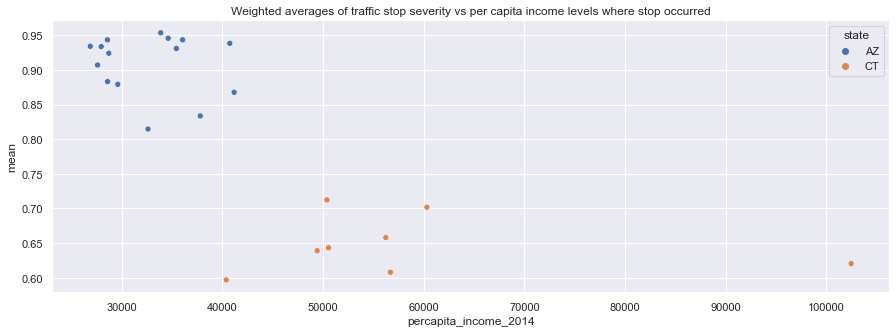

In [10]:
display(all_data_2.groupby(['state','percapita_income_2014'])['severity_value'].describe())

avg_by_stop = all_data_2.groupby(['state','percapita_income_2014'])['severity_value'].describe()

plt.figure(figsize = (15,5))
sns.scatterplot(x='percapita_income_2014',y = 'mean', data=avg_by_stop, hue ="state")
plt.title("Weighted averages of traffic stop severity vs per capita income levels where stop occurred")

plt.show()

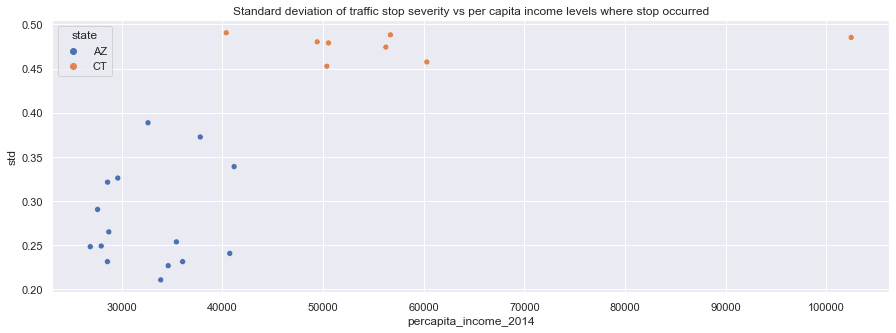

In [11]:
plt.figure(figsize = (15,5))
sns.scatterplot(x='percapita_income_2014',y = 'std', data=avg_by_stop, hue ="state")
plt.title("Standard deviation of traffic stop severity vs per capita income levels where stop occurred")
plt.show()

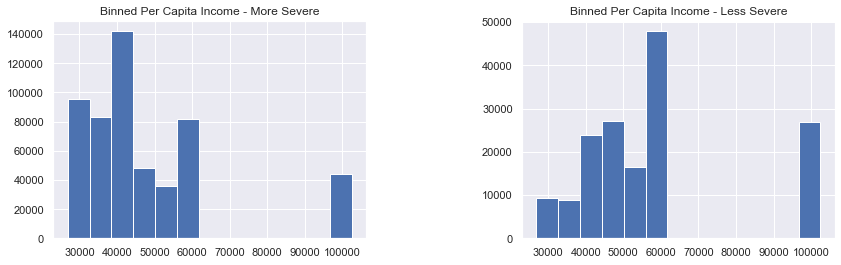

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
fig.subplots_adjust(wspace=0.5)

ax1.hist(x="percapita_income_2014", data=more_severe_reasons, bins = 13)
ax1.set_title("Binned Per Capita Income - More Severe")

ax2.hist(x="percapita_income_2014", data=less_severe_reasons, bins = 13)
ax2.set_title("Binned Per Capita Income - Less Severe")

plt.show()

In [33]:
severity_by_income2 = all_data_2.pivot_table(
    values ="severity_value"
    ,index = (['state','percapita_income_2014'])
    ,aggfunc=[np.mean, np.std])

# I want state and percapita to be columns, not indices.
severity_by_income = pd.DataFrame(severity_by_income2)
severity_by_income.reset_index(drop=False, inplace=True)
severity_by_income.columns = ['State', 'Income', 'Mean_Severity','Std_Dev_Severity']

print(severity_by_income)
severity_by_income.info(show_counts=True)


   State  Income  Mean_Severity  Std_Dev_Severity
0     AZ   26873       0.934118          0.248082
1     AZ   27603       0.907079          0.290328
2     AZ   27963       0.933685          0.248843
3     AZ   28579       0.943402          0.231085
4     AZ   28593       0.883185          0.321242
5     AZ   28718       0.924110          0.264829
6     AZ   29611       0.879209          0.325895
7     AZ   32612       0.814737          0.388542
8     AZ   33875       0.953576          0.210411
9     AZ   34614       0.945749          0.226516
10    AZ   35429       0.930978          0.253499
11    AZ   36050       0.943452          0.231091
12    AZ   37799       0.833613          0.372433
13    AZ   40736       0.938388          0.240454
14    AZ   41164       0.867678          0.338842
15    CT   40381       0.596916          0.490535
16    CT   49416       0.639041          0.480282
17    CT   50379       0.712352          0.452673
18    CT   50542       0.643223          0.479060


# ==========================================================
# Insights
### This is where I'll record the cool things I noticed.

This is not expressly related to my main issue tree.
1. I'm wondering under what circumstances is a "search conducted = True" but the "vehicle searched = False"? For example, is this when the driver is phyically searched but their car is not?
2. Looking at the multicolored graphs it seems like more severe stops are the lower per capita income areas and vice versa for the less severe stops. And this trend seems to persist even when sorted by gender.
3. I feel like my histograms show a distinctly different shape based on income. But that these graphs aren't really making the 'data sing'. I want to find a better way to highlight this trend.

# ----------------------------------------------------------------------------------------
## Does gender seem to correlate to severity of traffic stop?

1. I say, no. Based on calculating the average severity over all 689992 traffic stops in the final data frame.  Both males and females had an mean severity of .77 (rounded).
2. one interesting thing to note is that the same cannot be said of search conducted or vehicle search. In both of these instances, males have a higher incidence than their female counterparts.

In [10]:
display(all_data_2.groupby('subject_sex').mean())

,search_conducted,search_vehicle,severity_value,percapita_income_2014
subject_sex,,,,
female,0.029074,0.021005,0.766004,50479.225256
male,0.045289,0.037004,0.768209,48794.718974


# -------------------------------------------------------------------------------------

## Does income level correlate to severity of traffic stop?

1. I say, yes.

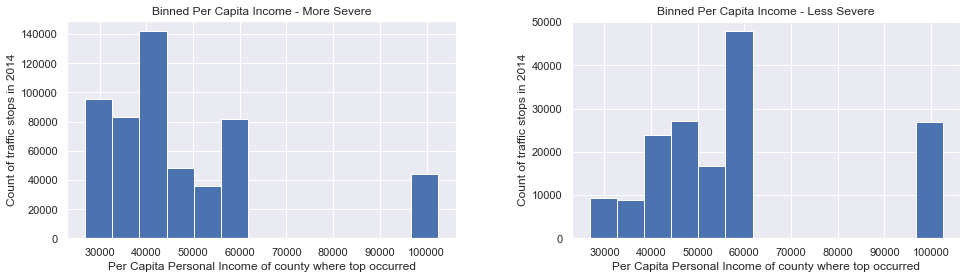

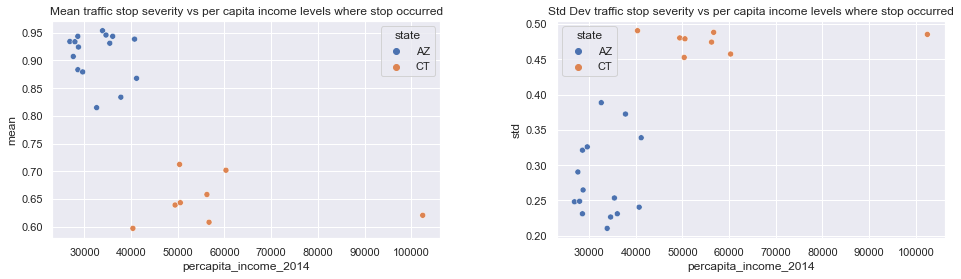

In [35]:
more_severe_reasons = all_data_2[all_data_2['severity_value']==1]
less_severe_reasons = all_data_2[all_data_2['severity_value']==0]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)

ax1.hist(x="percapita_income_2014", data=more_severe_reasons, bins = 13)
ax1.set(title = "Binned Per Capita Income - More Severe"
       ,ylabel = 'Count of traffic stops in 2014'
       ,xlabel = 'Per Capita Personal Income of county where top occurred')

ax2.hist(x="percapita_income_2014", data=less_severe_reasons, bins = 13)
ax2.set(title = "Binned Per Capita Income - Less Severe"
        ,ylabel = 'Count of traffic stops in 2014'
        ,xlabel = 'Per Capita Personal Income of county where top occurred')

avg_by_stop = all_data_2.groupby(['state','percapita_income_2014'])['severity_value'].describe()

fig, (ax3,ax4) = plt.subplots(1,2, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)

ax3 = sns.scatterplot(x='percapita_income_2014',y = 'mean', data=avg_by_stop, hue ="state", ax=ax3)
ax3.set_title("Mean traffic stop severity vs per capita income levels where stop occurred")

ax4 = sns.scatterplot(x='percapita_income_2014',y = 'std', data=avg_by_stop, hue ="state", ax =ax4)
ax4.set_title("Std Dev traffic stop severity vs per capita income levels where stop occurred")

plt.show()

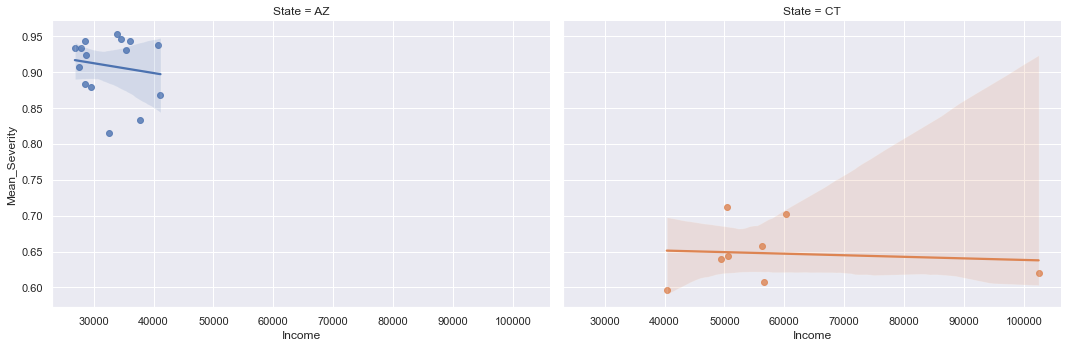

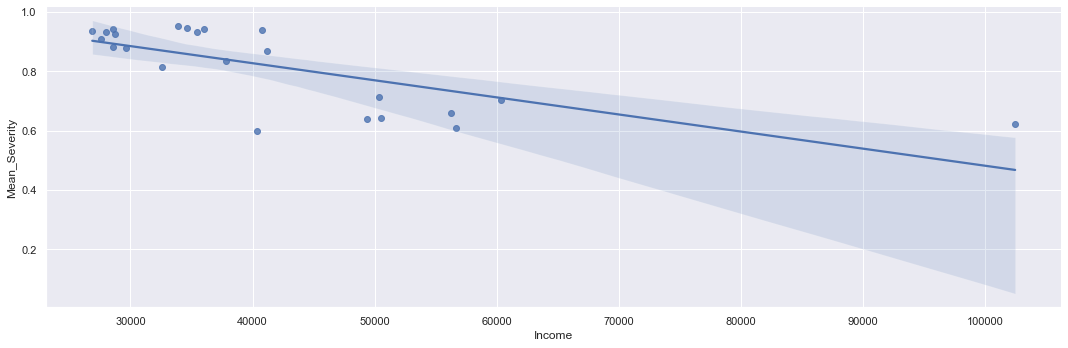

In [80]:
severity_by_income2 = all_data_2.pivot_table(
    values ="severity_value"
    ,index = (['state','percapita_income_2014'])
    ,aggfunc=[np.mean, np.std])

# I want state and percapita to be columns, not indices.
severity_by_income = pd.DataFrame(severity_by_income2)
severity_by_income.reset_index(drop=False, inplace=True)
severity_by_income.columns = ['State', 'Income', 'Mean_Severity','Std_Dev_Severity']

sns.lmplot(x = 'Income'
            , y = 'Mean_Severity'
            , data = severity_by_income
            , hue = 'State'
            , col = 'State'
            , aspect = 1.5
          )
   

sns.lmplot(x = 'Income'
          , y = 'Mean_Severity'
          , data = severity_by_income
          , aspect = 3
          )

plt.show()

I want to see the equations of these lines or at least the Pearson coefficients...
take another look at this:
https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

# --------------------------------------------------------------------------

### At this point in the process I transitioned into Tableau. I ended up recreating all of my interesting graphs from this notebook there. As well as doing some additional analyses.